In [1]:
import numpy as np

In [25]:
import networkx as nx
from parse import read_input_file, write_output_file
from utils import is_valid_network, average_pairwise_distance, average_pairwise_distance_fast
import glob, sys


def solve(G):
    """
    Args:
        G: networkx.Graph

    Returns:
        T: networkx.Graph
    """

    # TODO: your code here!
    short = nx.Graph()
    span = dict(nx.all_pairs_dijkstra(G))
    nodes = G.nodes()
    
    best_node = -1
    best_value = -1
    
#     for i in range(len(nodes)):
#         path_lengths = np.average(list(span[i][0].values()))
#         if best_value < 0 or path_lengths < best_value:
#             best_value = path_lengths
#             best_node = i
    
#     #append paths
#     paths = list(span[i][1].values())
    
#     for p in paths:
#         counter = 0
#         while counter < len(p) - 1:
#             if not short.has_edge(p[counter], p[counter+1]):
#                 short.add_edge(p[counter], p[counter+1], weight=G[p[counter]][p[counter+1]]['weight'])
        
#             counter+=1
                
    for i in range(len(nodes)):
        path_lengths = list(span[i][1].values())
        summed_avg = max([len(x) for x in path_lengths])
        
        
        if best_value < 0 or summed_avg < best_value:
            best_value = summed_avg
            best_node = i
    
    #append paths
    paths = list(span[i][1].values())
    
    for p in paths:
        counter = 0
        while counter < len(p) - 1:
            if not short.has_edge(p[counter], p[counter+1]):
                short.add_edge(p[counter], p[counter+1], weight=G[p[counter]][p[counter+1]]['weight'])
        
            counter+=1
   
    
    
    return short

In [26]:

#    inputs = sys.argv[1]
inputs = "../inputs/"
#    outputs = sys.argv[2]
outputs = "../outputs/"
for path in glob.glob(inputs + "small-1.in"):
    G = read_input_file(path)
    T = solve(G)
    write_output_file(T, outputs + path[len(inputs):-2] + "out")

In [34]:
print("Average  pairwise distance: {}".format(average_pairwise_distance(nx.minimum_spanning_tree(G))))
print("Average  pairwise distance: {}".format(average_pairwise_distance(T)))


Average  pairwise distance: 14.974666666666668
Average  pairwise distance: 12.354666666666665


In [8]:
def visualize_graph(G, round_labels=True):
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos)
    labels = nx.get_edge_attributes(G, 'weight')
    if round_labels:
        for key in labels:
            labels[key] = round(labels[key])
    nx.draw_networkx_edge_labels(G, pos, labels)
    plt.show()

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
from parse import read_input_file
import sys

/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


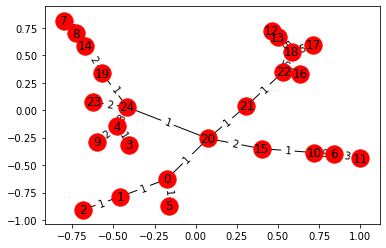

In [35]:
visualize_graph(T)

/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


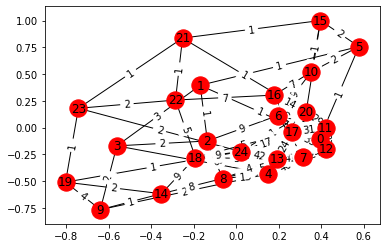

In [10]:
visualize_graph(G)

In [11]:
span = dict(nx.all_pairs_dijkstra(G))

In [12]:
span

{0: ({0: 0,
   20: 1.1,
   5: 1.2,
   1: 1.4,
   24: 1.7000000000000002,
   21: 2.4000000000000004,
   15: 2.6,
   2: 2.7,
   10: 2.8,
   19: 3.1,
   4: 3.2,
   23: 3.2,
   22: 3.6000000000000005,
   3: 4.1,
   9: 4.800000000000001,
   14: 4.9,
   18: 8.2,
   16: 9.5,
   6: 10.7,
   8: 12.5,
   17: 13.0,
   13: 13.2,
   11: 13.899999999999999,
   7: 15.899999999999999,
   12: 34.9},
  {0: [0],
   1: [0, 1],
   5: [0, 5],
   6: [0, 6],
   20: [0, 20],
   4: [0, 4],
   7: [0, 6, 7],
   11: [0, 6, 11],
   15: [0, 20, 15],
   21: [0, 20, 21],
   16: [0, 5, 10, 16],
   24: [0, 20, 24],
   17: [0, 20, 21, 22, 18, 17],
   10: [0, 5, 10],
   2: [0, 1, 2],
   3: [0, 1, 3],
   23: [0, 20, 24, 23],
   19: [0, 20, 24, 19],
   18: [0, 20, 21, 22, 18],
   13: [0, 20, 21, 22, 18, 13],
   22: [0, 20, 21, 22],
   8: [0, 20, 24, 19, 14, 8],
   14: [0, 20, 24, 19, 14],
   9: [0, 4, 9],
   12: [0, 20, 21, 22, 18, 13, 12]}),
 1: ({1: 0,
   2: 1.3,
   5: 1.3,
   0: 1.4,
   20: 2.5,
   3: 2.7,
   10: 2.90000

/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/mattpeng/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


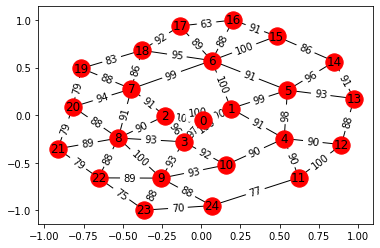

In [73]:
visualize_graph(G)

In [78]:
a = dict(nx.all_pairs_dijkstra(G))

In [95]:
len(a)

25

In [87]:
import numpy as np

In [93]:
np.average(list(a[0][0].values()))

224.74652000000003

In [60]:
T[18][14]

{'weight': 80.642}

In [76]:
G[17][16]

{'weight': 63.346}

In [138]:
print("Average  pairwise distance: {}".format(average_pairwise_distance(nx.minimum_spanning_tree(G))))
print("Average shortest path", nx.average_shortest_path_length(G))

Average  pairwise distance: 18.769316035530633
Average shortest path 1.5098176718092566
